## Simple Linear Regression

1. $X$ - feature.
2. $Y$ - label (output)
3. $\beta_0$, $\beta_1$ - model parameters
4. $\varepsilon$ - error term
5. $\hat{Y}$ - model prediction

$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$

$$
\hat{Y} = \beta_0 + \beta_1 X
$$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"data\student_scores.csv")

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


$$
\text{Scores} = \beta_0 + \beta_1 \text{Hours}
$$

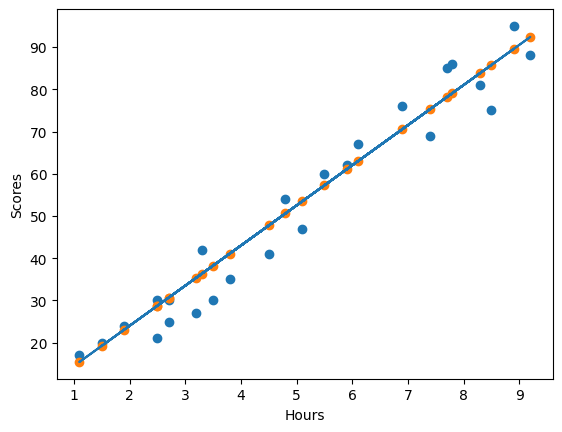

In [5]:
def model(Hours):
    return 9.5*Hours + 5

y_pred = model(df['Hours'])

plt.scatter(df['Hours'], df['Scores'])
plt.plot(df['Hours'], y_pred)
plt.scatter(df['Hours'], y_pred)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [6]:
x = df['Hours'].values
y = df['Scores'].values
y_pred = y_pred.values

$$
\varepsilon = y - \hat{y}
$$

In [7]:
y - y_pred

array([ -7.75,  -6.45,  -8.4 , -10.75,  -8.25,   0.75,  -4.4 ,   2.75,
        -2.85,  -5.65,   6.85,   0.95,  -6.75,   5.65,   1.55,   5.45,
         1.25,   0.95,   4.05,  -6.3 ,  -0.65,   3.4 ,  -6.1 ,   5.45,
         6.9 ])

$$
\varepsilon^2 = (y - \hat{y})^2
$$

In [8]:
np.sqrt(np.sum((y - y_pred)**2)) / len(y)

np.float64(1.106965220772541)

## Mean Squared Error

$$
\text{MSE}(\beta_0, \beta_1) = \sum_{i=1}^{N} \varepsilon^2 
$$

$$
\text{MSE}(\beta_0, \beta_1) = \sum_{i=1}^{N} (y - \hat{y})^2 
$$

$$
\text{MSE}(\beta_0, \beta_1) = \sum_{i=1}^{N} (y - (\beta_0 + \beta_1 x))^2 
$$



$$
z(x, y) = x^2 + 3y
$$

$$
\frac{\partial \text{MSE}(\beta_0, \beta_1)}{\partial \beta_0} = -2*\sum_{i=1}^{N} (y - (\beta_0 + \beta_1 x))
$$

$$
\frac{\partial \text{MSE}(\beta_0, \beta_1)}{\partial \beta_1} = -2*\sum_{i=1}^{N} (y - (\beta_0 + \beta_1 x))x
$$

$$
\sum_{i=1}^{N} y - \sum_{i=1}^{N} \beta_0 - \sum_{i=1}^{N} \beta_1 x = 0 \\
\sum_{i=1}^{N} yx - \sum_{i=1}^{N} \beta_0*x - \sum_{i=1}^{N} \beta_1 x^2 = 0
$$

$$
\beta_0 + \beta_1 \cdot \bar{x} = \bar{y} \\
\beta_0 \cdot \bar{x} + \beta_1 \cdot \bar{x^2} = \bar{yx}
$$

$$
\beta_1 = \frac{\bar{xy} - \bar{y}\cdot \bar{x}}{\bar{x^2} - \bar{x}^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \cdot \bar{x}
$$

In [9]:
np.mean(x)

np.float64(5.012)

In [10]:
np.mean(y)

np.float64(51.48)

In [11]:
np.mean(x**2)

np.float64(31.241200000000003)

In [12]:
np.mean(x*y)

np.float64(317.856)

In [13]:
beta1 = (np.mean(x) * np.mean(y) - np.mean(x*y)) / (np.mean(x)**2 - np.mean(x**2))
beta0 = np.mean(y) - beta1 * np.mean(x)

print(f"{beta0=}")
print(f"{beta1=}")

beta0=np.float64(2.48367340537321)
beta1=np.float64(9.775803390787468)


In [14]:
y_pred = beta0 + beta1 * x

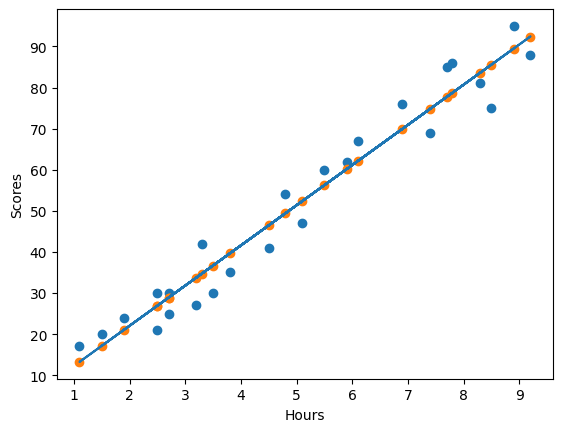

In [15]:
plt.scatter(x, y)
plt.plot(x, y_pred)
plt.scatter(x, y_pred)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

1. Variation / Standard Deviation
2. Covariation
3. Correlation

Variation

$$
\sigma_x^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2
$$

---

Standard Deviation

$$
\sigma_x = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2}
$$

---

$$
\text{Cov}_{xy} = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})
$$

---

$$
\text{Corr}_{xy} = \frac{\text{Cov}_{xy}}{\sigma_x \sigma_y}
$$

$$
-1 <= \text{corr} <= 1
$$

In [16]:
x - np.mean(x)

array([-2.512,  0.088, -1.812,  3.488, -1.512, -3.512,  4.188,  0.488,
        3.288, -2.312,  2.688,  0.888, -0.512, -1.712, -3.912,  3.888,
       -2.512, -3.112,  1.088,  2.388, -2.312, -0.212, -1.212,  1.888,
        2.788])

In [17]:
y - np.mean(y)

array([-30.48,  -4.48, -24.48,  23.52, -21.48, -31.48,  36.52,   8.52,
        29.52, -26.48,  33.52,  10.52, -10.48,  -9.48, -34.48,  43.52,
       -21.48, -27.48,  15.52,  17.52, -21.48,   2.52, -16.48,  24.52,
        34.52])

In [18]:
np.sum((x - np.mean(x)) * (y - np.mean(y)))

np.float64(1495.9560000000001)

$$
\sigma_x^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2 = \frac{1}{N}\sum_{i=1}^N x_i^2 - \frac{2\bar{x}}{N}\sum_{i=1}^N x_i + \frac{1}{N}\sum_{i=1}^N \bar{x}^2
$$

$$
\sigma_x^2 = \bar{x^2} - 2\bar{x}^2 + \bar{x}^2 = \bar{x^2} - \bar{x}^2
$$

$$
\sigma_x^2 = \bar{x^2} - \bar{x}^2
$$

$$
\text{Cov}_{xy} = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})
$$

$$
\text{Cov}_{xy} = \frac{1}{N}\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y}) = \frac{1}{N}\sum_{i=1}^N x_iy_i - \frac{1}{N}\sum_{i=1}^N x_i \bar{y} - \frac{1}{N}\sum_{i=1}^N \bar{x} y_i + \frac{1}{N}\sum_{i=1}^N \bar{x} \bar{y} = \\
\bar{xy} - \bar{y} \bar{x} - \bar{x} \bar{y} + \bar{x} \bar{y} = \bar{xy} - \bar{y} \bar{x}
$$

$$
\text{Cov}_{xy} = \bar{xy} - \bar{y} \bar{x}
$$

---

$$
\beta_1 = \frac{\text{Cov}_{xy}}{\sigma_x^2}
$$

$$
\beta_0 = \bar{y} - \beta_1 \cdot \bar{x}
$$

---

In [19]:
import statistics

In [20]:
statistics.variance(x)

np.float64(6.3761)

In [21]:
statistics.covariance(x, y)

62.331500000000005

In [22]:
statistics.correlation(x, y)

0.9761906560220887

In [23]:
beta_1 = statistics.covariance(x, y) / statistics.variance(x)
beta_1

np.float64(9.775803390787473)

### Linear Regression with Scikit Learn

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(x.reshape(-1, 1), y)

LinearRegression()

In [26]:
lin_reg.intercept_

np.float64(2.48367340537321)

In [27]:
lin_reg.coef_

array([9.77580339])

In [28]:
lin_reg.predict(x.reshape(-1, 1))

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [29]:
x.reshape(-1, 1) @ lin_reg.coef_ + lin_reg.intercept_

array([26.92318188, 52.3402707 , 33.76624426, 85.57800223, 36.69898527,
       17.14737849, 92.4210646 , 56.25059205, 83.62284155, 28.87834256,
       77.75735951, 60.16091341, 46.47478866, 34.74382459, 13.23705714,
       89.48832358, 26.92318188, 21.05769985, 62.11607409, 74.8246185 ,
       28.87834256, 49.40752968, 39.63172629, 69.9367168 , 78.73493985])

In [30]:
lin_reg.score(x.reshape(-1, 1), y)

0.9529481969048356